##import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##loading the dataset

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
##Exploring the data

In [4]:
iris_data = data.drop(['Id'], axis=1)
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(iris_data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Text(0, 0.5, 'count')

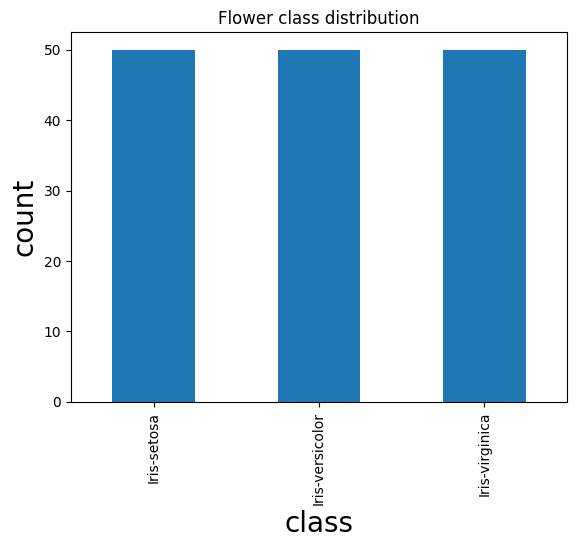

In [8]:
##class distribution
distribution=iris_data['Species'].value_counts().plot.bar(title='Flower class distribution')
distribution.set_xlabel('class',size=20)
distribution.set_ylabel('count',size=20)


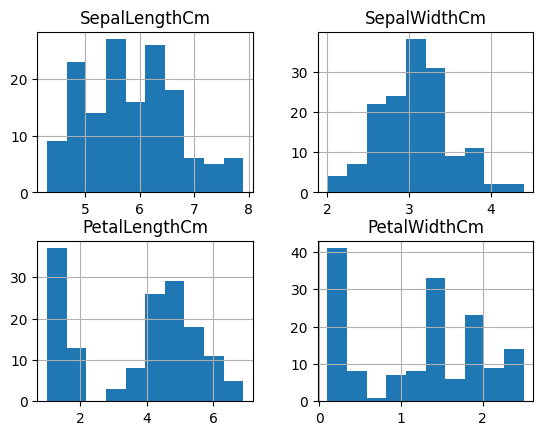

In [9]:
##histogram 
iris_data.hist()
plt.show()

c:\Users\Aaminah masarrath\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


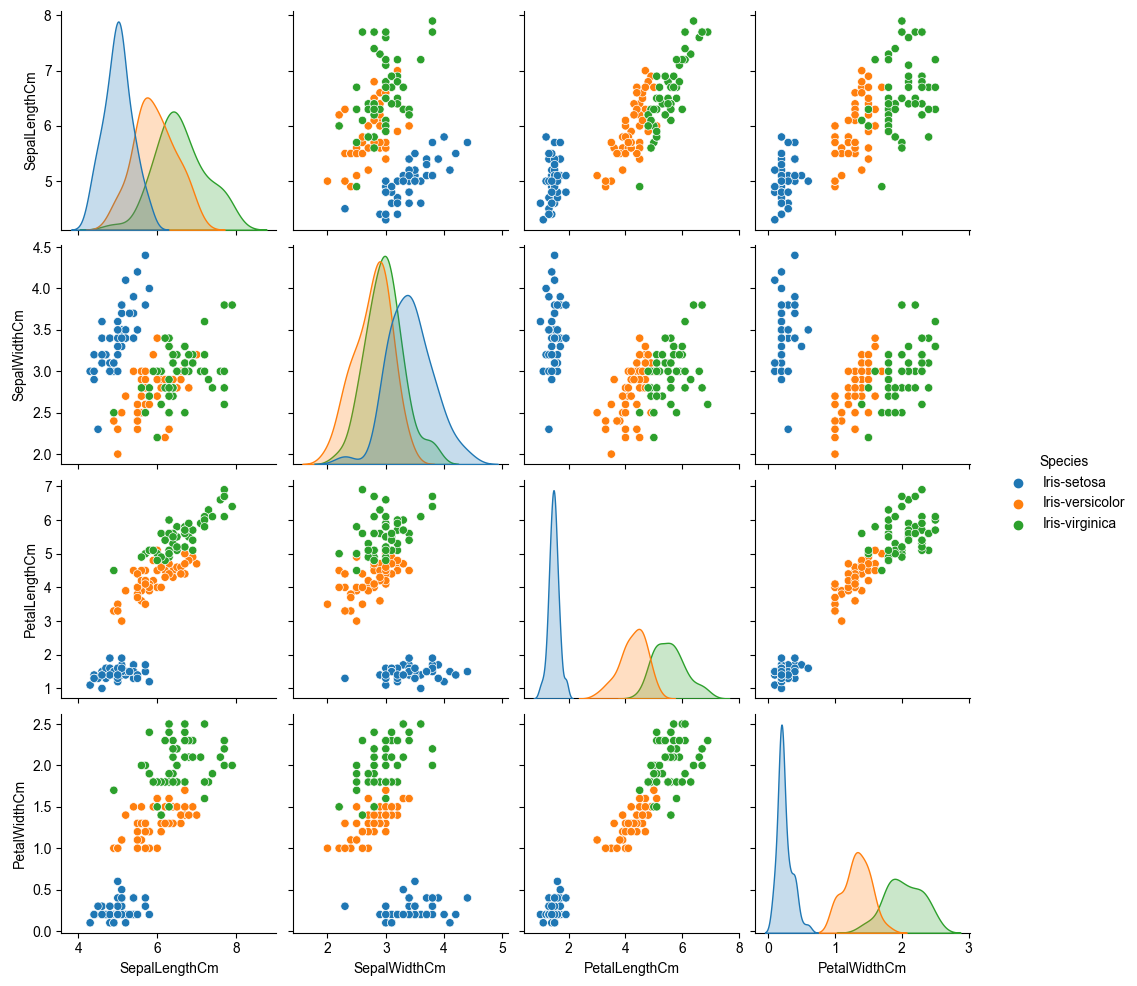

In [10]:
sns.pairplot(iris_data, hue='Species')
sns.set(style="ticks")

##MODEL TRAINING

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = iris_data.drop(['Species'], axis=1)
Y = iris_data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [13]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
#models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:
LR: accuracy=0.966667 std=(0.040825)
LDA: accuracy=0.975000 std=(0.038188)
CART: accuracy=0.975000 std=(0.038188)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.975000 std=(0.053359)
SVC: accuracy=0.991667 std=(0.025000)


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [23]:
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing LR
Accuracy: 0.8
Confusion Matrix:
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

       accuracy                           0.80        30
      macro avg       0.85      0.83      0.82        30
   weighted avg       0.83      0.80      0.80        30

----------------
Testing LDA
Accuracy: 0.9666666666666667
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        3